In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import utils, network
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Ex. 3

In [3]:
patches = utils.load_dataset('natural_images/')

## 3.1 : non competitive 

### 3.1.2, 3.1.3

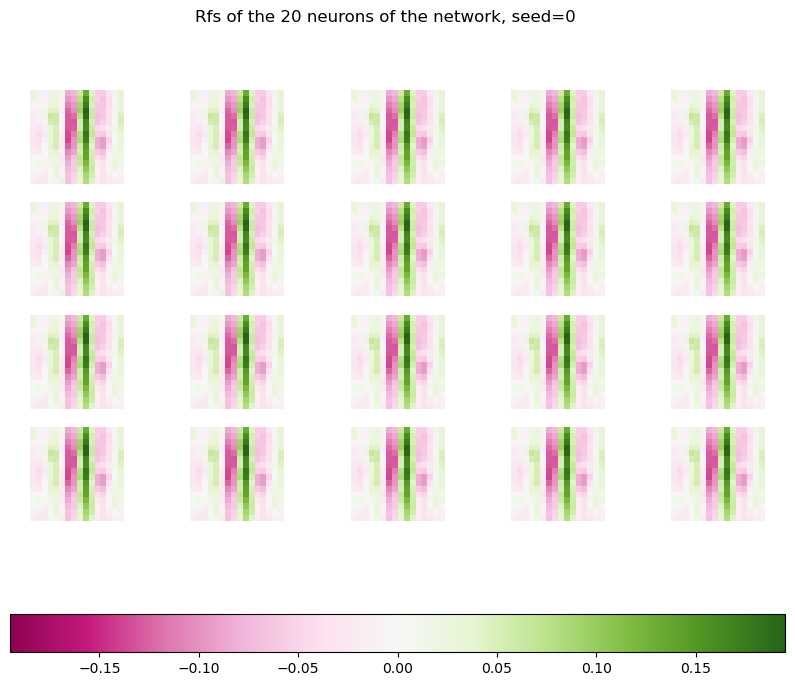

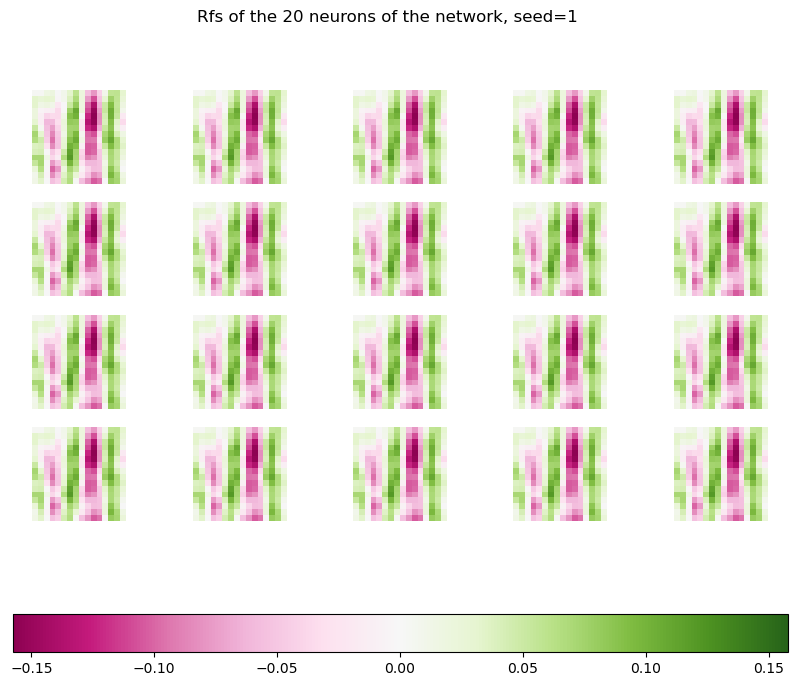

Training networks with different seeds:   0%|          | 0/20 [00:00<?, ?it/s]

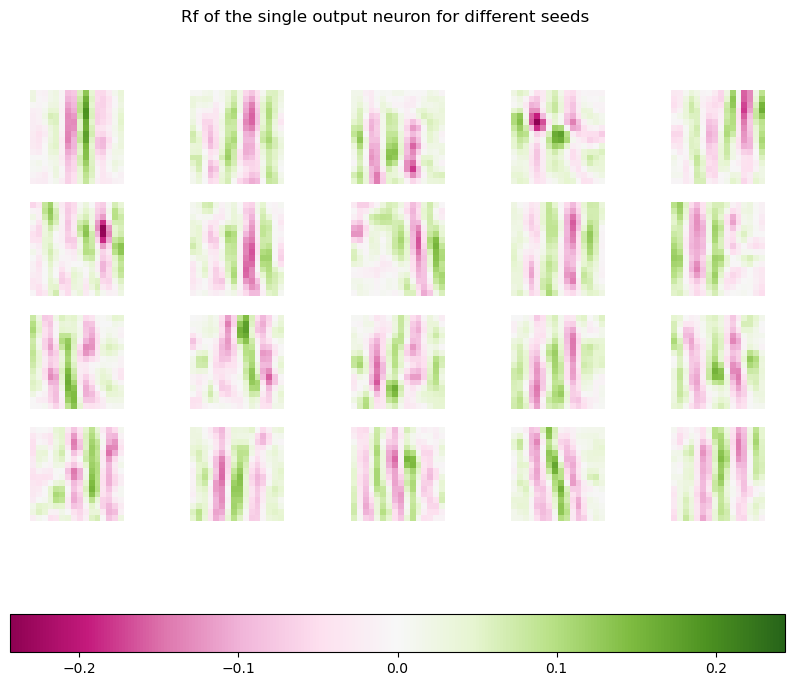

In [4]:
for seed in range(2):
    net = network.Visual_network(
        n_in=16*16,
        n_out=20,
        seed=seed,
    )
    utils.train_network(
        net=net,
        patches=patches,
        theta=np.array([1]),
        n_iter=150000,
        gamma=1e-4,
        seed=seed,
        tau=None
    )
    utils.show_RFs(net.weights, n_col=5, patch_size=16, title=f'Rfs of the 20 neurons of the network, seed={seed}' )
    
    
theta = np.ones((1,))
n_iter = int(150e3)
gamma = 1e-4
n_trials = 20
seeds = range(n_trials)
rfs = []
for seed in tqdm(seeds, desc="Training networks with different seeds", leave=False):
    net = network.Visual_network(
        n_in = 16*16,
        n_out = 1,
        seed=seed,
    )
    utils.train_network(
        net=net,
        patches=patches,
        theta=theta,
        n_iter=n_iter,
        gamma=gamma,
        seed=seed,
        tau=None
    )
    rfs.append(net.weights)
utils.show_RFs(rfs, n_col=5, patch_size=16, title="Rf of the single output neuron for different seeds")
    

#### Answer:
- In the current RFs (multiple neurons but without lateral competition) each neuron learns independently; because they all see the same input statistics and they all have the same fixed $\theta$ , the weight dynamics push them toward the same principal component of the data so all the RFs look the same. Random initial weights do not matter once the dominant component takes over.
- In the RFs of $1.6$ (single neuron, different seeds) the random initial weights and the random patch order lead to different local optima, even if they are all still dominated by the same principal component of the data. So each experiment can land on a slightly different result (RF).  

### 3.1.4

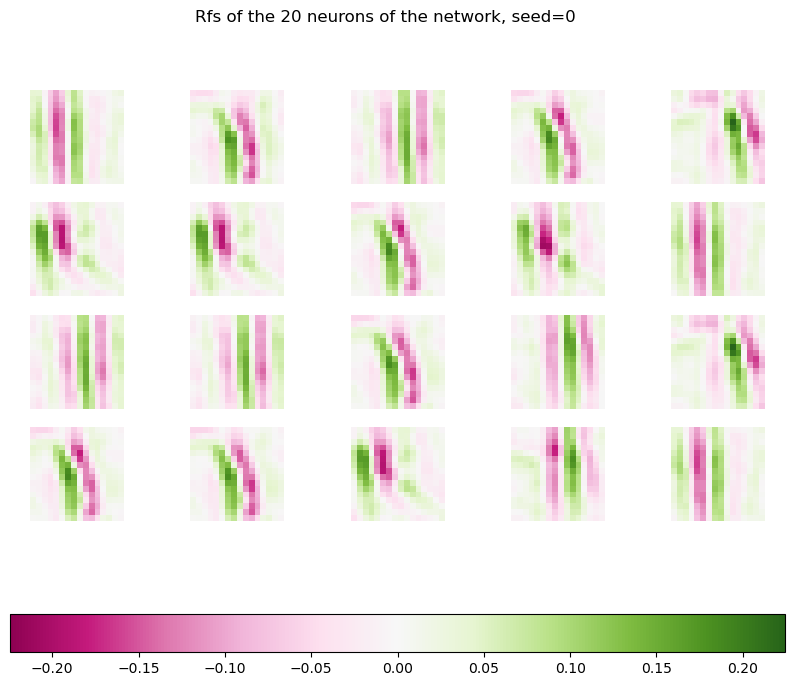

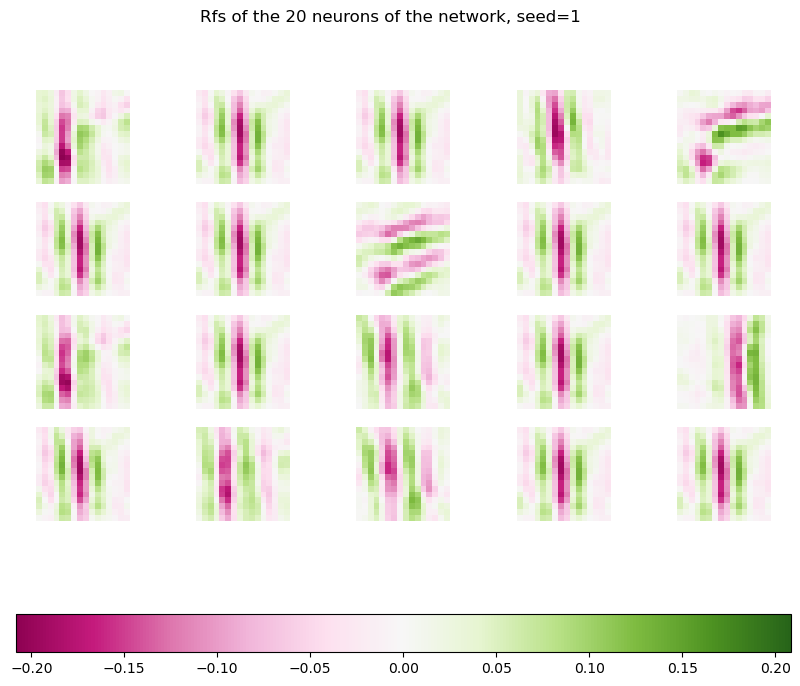

In [5]:
for seed in range(2):
    net = network.Visual_network(
        n_in=16*16,
        n_out=20,
        seed=seed,
    )
    utils.train_network(
        net=net,
        patches=patches,
        theta=np.zeros((20,)),
        n_iter=150000,
        gamma=1e-5,
        seed=seed,
        tau=100
    )
    utils.show_RFs(net.weights, n_col=5, patch_size=16, title=f'Rfs of the 20 neurons of the network, seed={seed}' )

### 3.1.5
#### Answer:
With no competition between neurons the only randomness comes from the
initial weights and patch order.  
A fixed $\theta$ simply gates when potentiation stops:

* $\theta$ very low -> everything potentiates -> weights fly to the dominant
  variance direction and freeze.
* $\theta$ very high -> almost nothing crosses the threshold -> weights hardly
  move.

Either way every neuron ends up on the same feature, so $\theta$ mostly sets
“how fast” they get there, not “what” they learn.

If $\theta$ is adaptive (BCM sliding threshold) each neuron keeps nudging
its own set-point toward its recent activity.  That self-feedback can push a neuron off the dominant feature and make
it explore others, but without lateral competition it will still
converge to whichever feature gives the biggest response given its
initial random weights.  
So diversity remains limited; $\theta$ just changes the time-course and the
exact point where each weight vector settles.